# Lesson 3 Notes
Finally, getting into non-ideal stuff. Considering last notebook with no drag resulted in harmonic motion, I would expect the drag to add some damping to the system, resulting in the classical spring-mass-damper system.

Stop! HANG ON! STAHP!! Weakly damped phugoid motion at altitude is only a slight inconvienance?? This does mean that the phugoidal motions will now be slower to reach the equilibrium point right?? How is that the case? Slight inconveniance to what?? The overall safety and stability of the aircraft? Maybe. To the passenger breastfeeding her child in the bathroom?? MINOR INCONENIANCE MY {bleep!}.

So you can pass functions as parameters...this is different than Java where, Parse.int(a.toString());, because the a.toString() would actually be evaluated first, and then that value would be passted to Parse.int(). Here we are saying something along the lines of recursion, with a function within a function, or rather, something like iphone.dial(){phone.on(); speaker.on(); ... etc. } but with the phone.on() and speaker.on() functions in the parameters.

## Begin Solving
Note 1: why not just import all of math? Does it load all the functions in the library or only creates a symbolic link such that functions can be accessed through the link?

In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

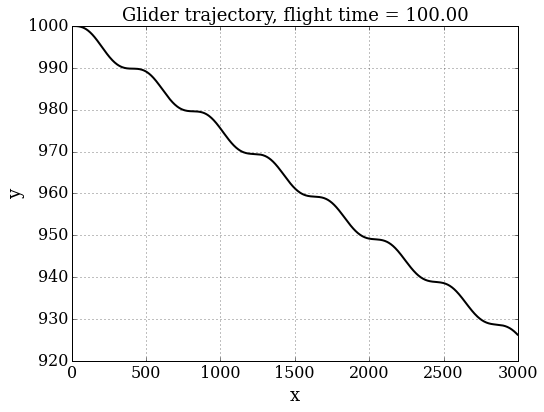

In [3]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1} - may make this random later in another function, similar to what we did in lesson 2  
C_D = 1/40  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1
## NOTE: A quick glance through the rest of the notebook shows C_D/C_L only used once, so instead of two separate variables
## WE can combine them into a single variable that is also randomly generated via rand (random value range through wiki)

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude

## defining the f(u) function...decided to do it here to make sure everything recompiles in case values get changed 
## (plus it'll be easier to abstract things away later...)
def f(u):
    '''
    U - vector of state variables
    returns u' - the time derivative of U, as an array
    '''
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

## Defining the the euler step, as discussed earlier
def euler_step(u,f,dt):
    return u+f(u)*dt

## setting intial values like before
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps, need to add one more to include the zero timestep
t = numpy.linspace(0, T, N)      # time discretization, same as last lessons

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4)) ## tuple sets the shape of u
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1): # going to N would result in out-of-bounds exception
    u[n+1] = euler_step(u[n], f, dt)
    
# get the glider's position with respect to the time
x = u[:,2] # x is stored in the 3rd column; indexing starts at 0
y = u[:,3] # y is stored in the 4th column; indexing starts at 0

# plotting glider trajectory
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);